In [1]:
import importlib
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
from multi_loc import covariance, assimilate

In [13]:
%matplotlib notebook

In [4]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [31]:
dimension = 101
rho0 = 5
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [32]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_exp_1d,
    return_Corr = True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

<IPython.core.display.Javascript object>


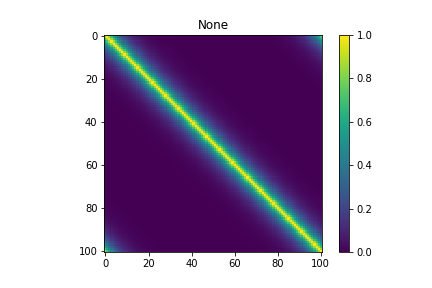

<IPython.core.display.Javascript object>


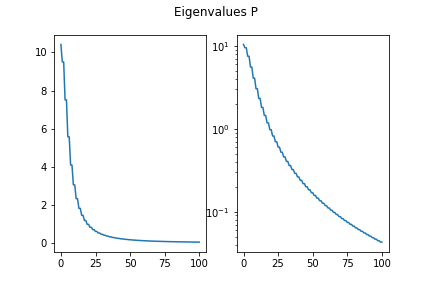

Text(0.5,0.98,'Eigenvalues P')

In [33]:
imshow(P, vmin=0)
fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

<IPython.core.display.Javascript object>


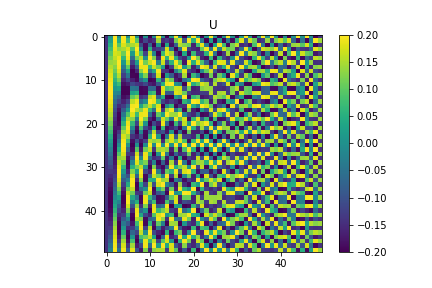

<IPython.core.display.Javascript object>


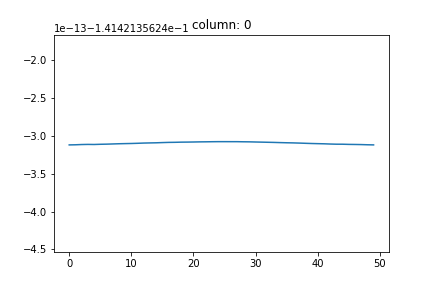

<IPython.core.display.Javascript object>


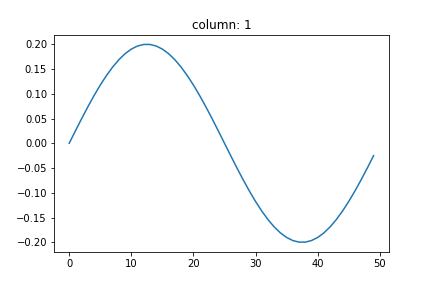

<IPython.core.display.Javascript object>


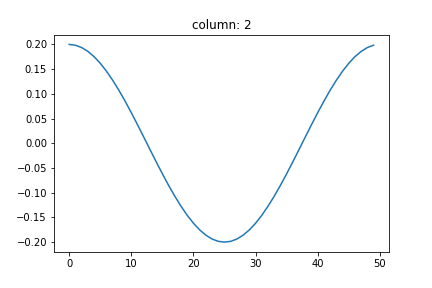

<IPython.core.display.Javascript object>


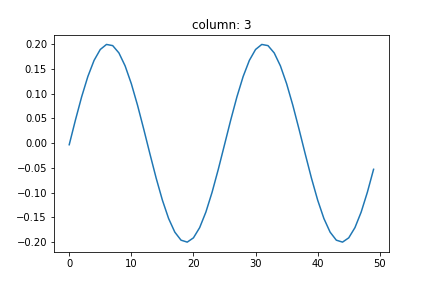

<IPython.core.display.Javascript object>


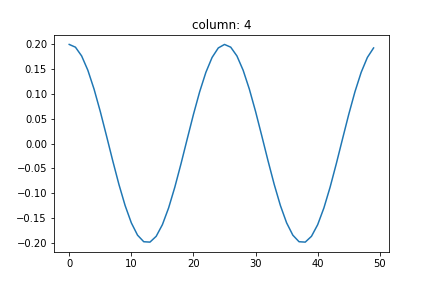

<IPython.core.display.Javascript object>


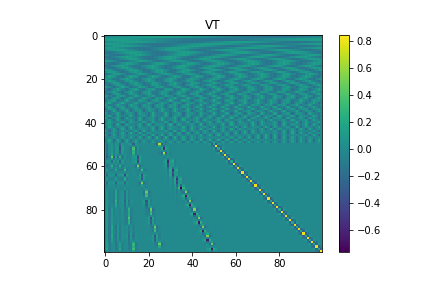

<IPython.core.display.Javascript object>


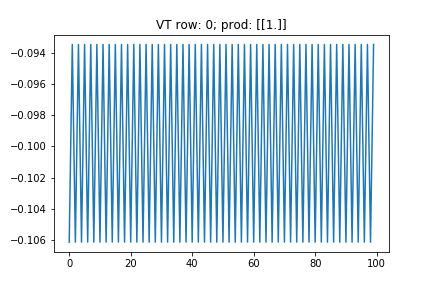

<IPython.core.display.Javascript object>


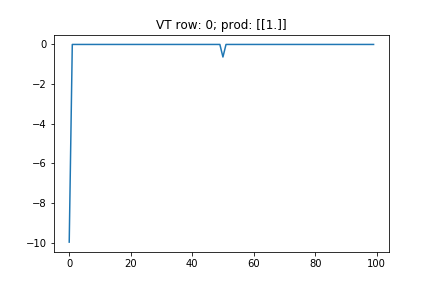

/anaconda3/envs/loc/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


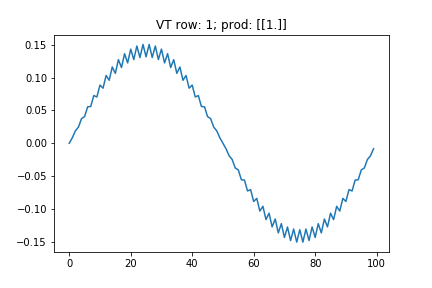

<IPython.core.display.Javascript object>


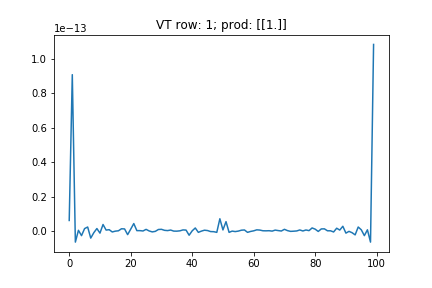

<IPython.core.display.Javascript object>


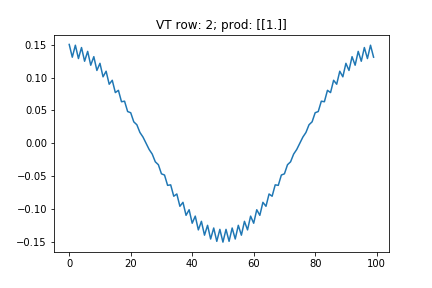

<IPython.core.display.Javascript object>


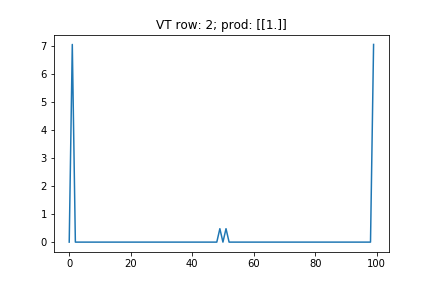

<IPython.core.display.Javascript object>


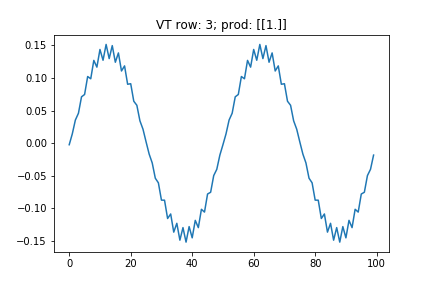

<IPython.core.display.Javascript object>


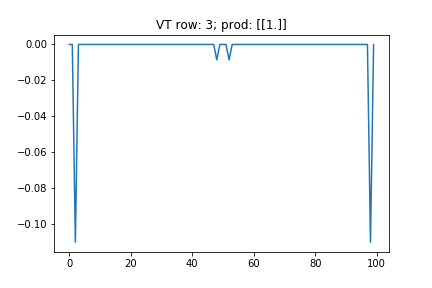

<IPython.core.display.Javascript object>


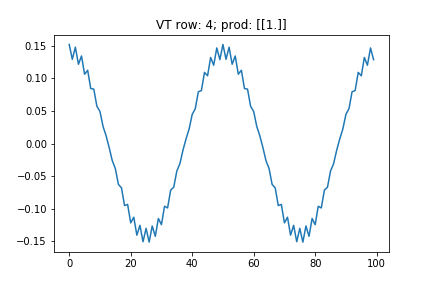

<IPython.core.display.Javascript object>


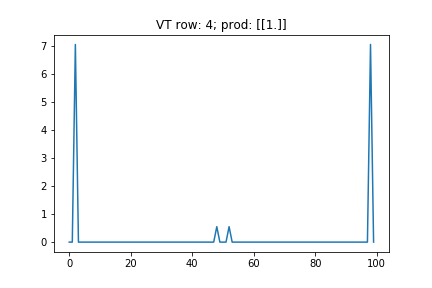

In [30]:
imshow(U, 'U')

for ii in range(5):   
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'column: {ii}')
    
    u_fft = np.fft.fft(U[:, ii])
    plt.figure()
    plt.plot(u_fft)
    plt.title(f'VT row: {ii}; prod: {prod}')
    
imshow(VT, 'VT')

for ii in range(5):
    x = np.arange(dimension)/dimension*2*np.pi
    truth = np.cos(x*ii)
    prod = VT[ii][None, :] @ VT[ii][None, :].conj().T
    
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}; prod: {prod}')
    
    v_fft = np.fft.fft(VT[ii])
    plt.figure()
    plt.plot(v_fft)
    plt.title(f'FFT of ')

In [34]:
dimension = 101
rho0 = 2
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [35]:
%matplotlib notebook

<IPython.core.display.Javascript object>


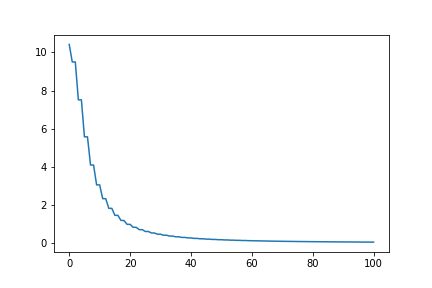

In [36]:
plt.figure()
plt.plot(eig_val)

In [83]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_sqd_exp_1d,
    return_Corr = True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

<IPython.core.display.Javascript object>


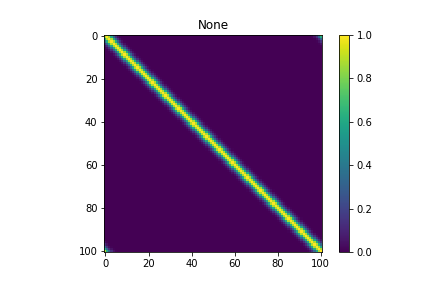

<IPython.core.display.Javascript object>


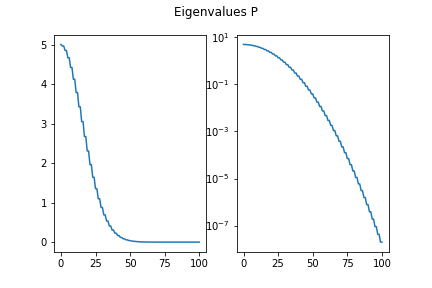

Text(0.5,0.98,'Eigenvalues P')

In [84]:
imshow(P, vmin=0)
fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

<IPython.core.display.Javascript object>


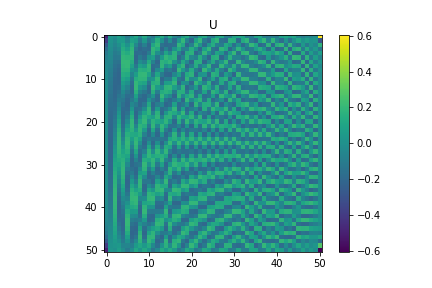

<IPython.core.display.Javascript object>


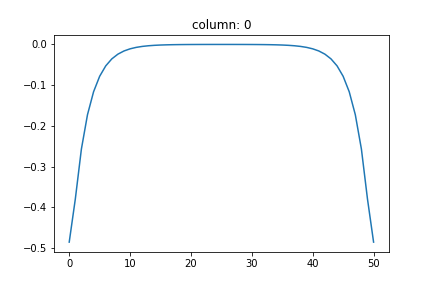

<IPython.core.display.Javascript object>


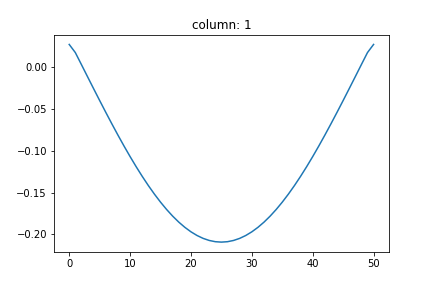

<IPython.core.display.Javascript object>


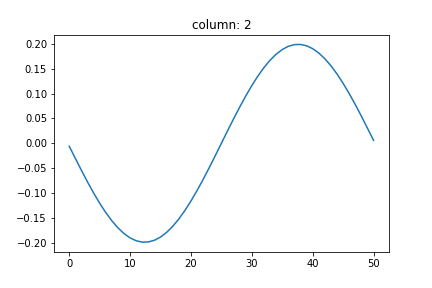

<IPython.core.display.Javascript object>


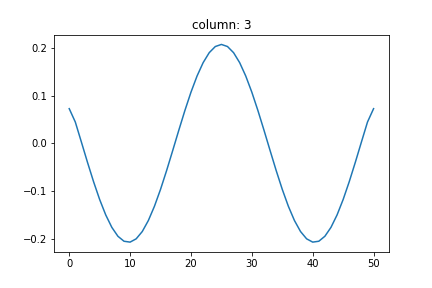

<IPython.core.display.Javascript object>


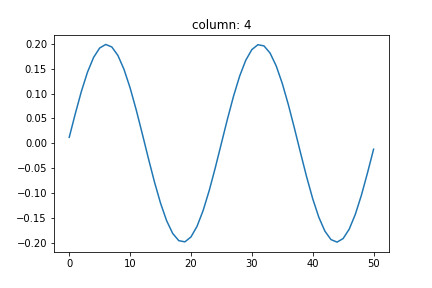

<IPython.core.display.Javascript object>


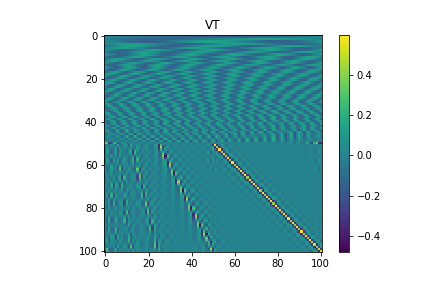

<IPython.core.display.Javascript object>


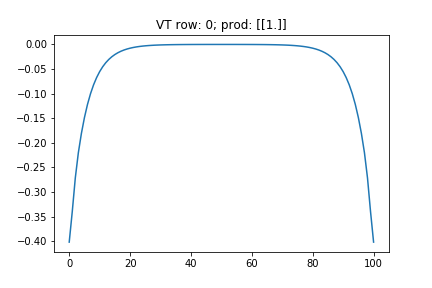

<IPython.core.display.Javascript object>


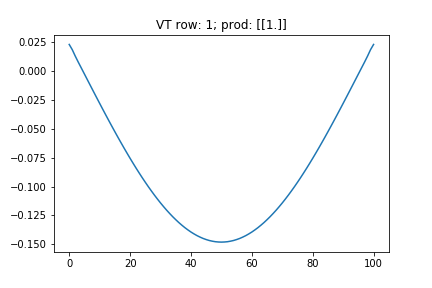

<IPython.core.display.Javascript object>


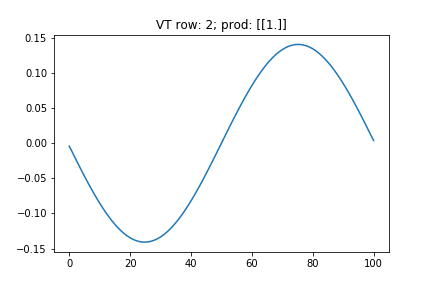

<IPython.core.display.Javascript object>


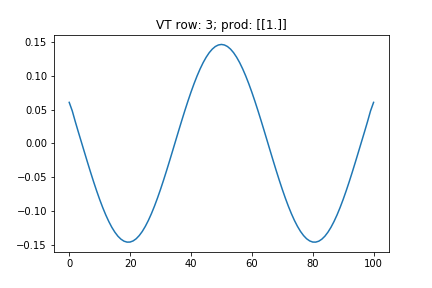

<IPython.core.display.Javascript object>


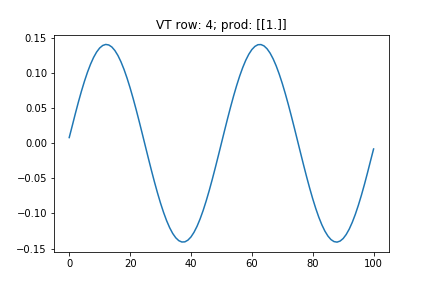

In [85]:
imshow(U, 'U')

for ii in range(5):   
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'column: {ii}')
    
imshow(VT, 'VT')

for ii in range(5):
    x = np.arange(dimension)/dimension*2*np.pi
    truth = np.cos(x*ii)
    prod = VT[ii][None, :] @ VT[ii][None, :].conj().T
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}; prod: {prod}')